In [1]:
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd
import time
import os
import json
from typing import Dict, List, Optional, Union, cast
import requests
from env import github_token, github_username
import unicodedata
import nltk
import prepare as p
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import model as m


# CodeUp-DS-NLP-Project
 
### Project Goals 
* The goal of this classification project is to first identify key words of the programming language and create a machine learning model that can effectly predict the programming language used.
### The Plan
* Aquire ReadMe data from GitHub repositories via webscraping.
* Prepare data for exploration by:
    * Convert text to all lower case for normalcy.
    * Remove any accented characters, non-ASCII characters.
    * Remove special characters.
    * Lemmatize the words.
    * Remove stopwords.
    * Store the clean text and the original text for use in future notebooks.
#### Explore data in search of key features with the basic following questions:
* What are the most common words in READMEs?
* Does the length of the README vary by programming language?
* Do different programming languages use a different number of unique words?
* Are there any words that uniquely identify a programming language?
#### Develop a Model to predict happiness score
* Use key words identified to build predictive models of different types
* Evaluate models on train and validate data samples
* Select the best model based on accuracy
* Evaluate the best model on test data samples
#### Draw conclusions

### Steps to Reproduce
* Clone this repo.
* Acquire the data from GitHub
* Put the data in the file containing the cloned repo.
* Run notebook
### Conclusions
* 
#### Key TakeAway:
*
### Recommendations
*

In [ ]:

#url = "https://github.com/search?3&q=stars%3A%3E0&s=stars&type=Repositories"
#reqs = requests.get(url)
#soup = BeautifulSoup(reqs.text, 'html.parser')
#urls = []
#for link in soup.find_all('a',class_="v-align-middle"):
#    print(link.get('href'))

In [ ]:
# remember the lesson that Rosy showed you
#for i in range(1,50):
#    print(i)
#    time.sleep(10)

In [ ]:

#url = "https://github.com/search?3&q=stars%3A%3E0&s=stars&type=Repositories"
#reqs = requests.get(url)
#soup = BeautifulSoup(reqs.text, 'html.parser')
#urls = []
#for link in soup.find_all('a',class_="v-align-middle"):
#    urls.append(link.get('href'))

In [ ]:
#urls_repo = pd.read_csv('urls.csv', index_col=0)
#urls_repo['0']

In [ ]:
REPOS = urls_repo['0']

headers = {"Authorization": f"token {github_token}", "User-Agent": github_username}

if headers["Authorization"] == "token " or headers["User-Agent"] == "":
    raise Exception(
        "You need to follow the instructions marked TODO in this script before trying to use it"
    )


def github_api_request(url: str) -> Union[List, Dict]:
    response = requests.get(url, headers=headers)
    response_data = response.json()
    if response.status_code != 200:
        raise Exception(
            f"Error response from github api! status code: {response.status_code}, "
            f"response: {json.dumps(response_data)}"
        )
    return response_data


def get_repo_language(repo: str) -> str:
    url = f"https://api.github.com/repos/{repo}"
    repo_info = github_api_request(url)
    if type(repo_info) is dict:
        repo_info = cast(Dict, repo_info)
        if "language" not in repo_info:
            raise Exception(
                "'language' key not round in response\n{}".format(json.dumps(repo_info))
            )
        return repo_info["language"]
    raise Exception(
        f"Expecting a dictionary response from {url}, instead got {json.dumps(repo_info)}"
    )


def get_repo_contents(repo: str) -> List[Dict[str, str]]:
    url = f"https://api.github.com/repos/{repo}/contents/"
    contents = github_api_request(url)
    if type(contents) is list:
        contents = cast(List, contents)
        return contents
    raise Exception(
        f"Expecting a list response from {url}, instead got {json.dumps(contents)}"
    )


def get_readme_download_url(files: List[Dict[str, str]]) -> str:
    """
    Takes in a response from the github api that lists the files in a repo and
    returns the url that can be used to download the repo's README file.
    """
    for file in files:
        if file["name"].lower().startswith("readme"):
            return file["download_url"]
    return ""


def process_repo(repo: str) -> Dict[str, str]:
    """
    Takes a repo name like "gocodeup/codeup-setup-script" and returns a
    dictionary with the language of the repo and the readme contents.
    """
    contents = get_repo_contents(repo)
    readme_download_url = get_readme_download_url(contents)
    if readme_download_url == "":
        readme_contents = ""
    else:
        readme_contents = requests.get(readme_download_url).text
    return {
        "repo": repo,
        "language": get_repo_language(repo),
        "readme_contents": readme_contents,
    }


def scrape_github_data() -> List[Dict[str, str]]:
    """
    Loop through all of the repos and process them. Returns the processed data.
    """
    return [process_repo(repo) for repo in REPOS]


#if __name__ == "__main__":
#    data = scrape_github_data()
#    json.dump(data, open("data.json", "w"), indent=1)

In [ ]:
#urls_df = scrape_github_data()

In [ ]:
#df=pd.DataFrame(urls_df)
df = pd.read_csv('readme_df.csv')
df

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

In [ ]:
df = df[(df.language == 'Java') | (df.language=='JavaScript') | (df.language=='Python') | (df.language=='TypeScript')]

In [ ]:
df.reset_index(drop = True, inplace= True)

In [ ]:
def basic_clean(string):
    '''
    This function takes in a string and
    returns the string normalized.
    '''
    # we will normalize our data into standard NFKD unicode, feed it into an ascii encoding
    # decode it back into UTF-8
    string = unicodedata.normalize('NFKD', string)\
             .encode('ascii', 'ignore')\
             .decode('utf-8', 'ignore')
    # utilize our regex substitution to remove our undesirable characters, then lowercase
    string = re.sub(r"[^\w0-9'\s]", '', string).lower()
    return string

In [ ]:
#inshort_df[‘clean_text’] = inshort_df.content.apply(clean).apply(' ’.join)

In [ ]:
df['clean_text']= df.readme_contents.apply(p.basic_clean)

# start here after scrapping
### get dataframe from csv and clean using prep functions

In [5]:
# acquire readme data
df = pd.read_csv('readme_df.csv')

In [6]:
# cleaning data
df = p.data_prep(df)

# prepare text for exploration 
df = p.text_prep(df)


# split data: train, validate and test
train, validate, test = p.split_data(df, 'language')

### RATIOS

In [7]:
labels = pd.concat([df.language.value_counts(),
                    df.language.value_counts(normalize=True)], axis=1)
labels.columns = ['n', 'percent']
labels


,n,percent
JavaScript,169,0.448276
Python,88,0.233422
Java,62,0.164456
TypeScript,58,0.153846


In [8]:
def show_counts_and_ratios(df, column):
    """
    Takes in a dataframe and a string of a single column
    Returns a dataframe with absolute value counts and percentage value counts
    """
    labels = pd.concat([df[column].value_counts(),
                    df[column].value_counts(normalize=True)], axis=1)
    labels.columns = ['n', 'percent']
    labels
    return labels




In [9]:
def tokenize(string):
    '''
    This function takes in a string and
    returns a tokenized string.
    '''
    # make our tokenizer, taken from nltk's ToktokTokenizer
    tokenizer = nltk.tokenize.ToktokTokenizer()
    # apply our tokenizer's tokenization to the string being input, ensure it returns a string
    string = tokenizer.tokenize(string, return_str = True)
    
    return string

In [10]:
df['clean_text']= df.clean_text.apply(p.tokenize)

In [11]:
df

,repo,language,readme_contents,clean_text
0,freeCodeCamp/freeCodeCamp,TypeScript,[![freeCodeCamp Social Banner](https://s3.amaz...,freecodecamp social bannerhttpss3amazonawscomf...
1,microsoft/vscode,TypeScript,"# Visual Studio Code - Open Source (""Code - OS...",visual studio code open source code os feature...
2,axios/axios,JavaScript,"<h1 align=""center"">\n <b>\n <a href=""...",h1 aligncenter b hrefhttpsaxioshttpcomimg srch...
3,microsoft/TypeScript,TypeScript,\r\n# TypeScript\r\n\r\n[![GitHub Actions CI](...,typescript github action cihttpsgithubcommicro...
4,tensorflow/models,Python,"<div align=""center"">\n <img src=""https://stor...",div aligncenter img srchttpsstoragegoogleapisc...
...,...,...,...,...
372,jquery-form/form,JavaScript,# jQuery Form [![Build Status](https://travis-...,jquery form build statushttpstravisciorgjquery...
373,Mailtrain-org/mailtrain,JavaScript,# Mailtrain v2\n\nMailtrain is a self hosted n...,mailtrain v2 mailtrain self hosted newsletter ...
374,google/error-prone,Java,# Error Prone\n\nError Prone is a static analy...,error prone error prone static analysis tool j...
375,pentaho/pentaho-kettle,Java,# Pentaho Data Integration # \n\nPentaho Data ...,pentaho data integration pentaho data integrat...


In [12]:
def lemmatize(string):
    '''
    This function takes in string for and
    returns a string with words lemmatized.
    '''
    # create our lemmatizer object
    wnl = nltk.stem.WordNetLemmatizer()
    # use a list comprehension to lemmatize each word
    # string.split() => output a list of every token inside of the document
    lemmas = [wnl.lemmatize(word) for word in string.split()]
    # glue the lemmas back together by the strings we split on
    string = ' '.join(lemmas)
    #return the altered document
    return string

In [13]:
df['clean_text']= df.clean_text.apply(p.lemmatize)

In [14]:
extra_words = ["'"]

In [15]:
def remove_stopwords(string, extra_words = [], exclude_words = []):
    '''
    This function takes in a string, optional extra_words and exclude_words parameters
    with default empty lists and returns a string.
    '''
    # assign our stopwords from nltk into stopword_list
    stopword_list = stopwords.words('english')
    # utilizing set casting, i will remove any excluded stopwords
    stopword_list = set(stopword_list) - set(exclude_words)
    # add in any extra words to my stopwords set using a union
    stopword_list = stopword_list.union(set(extra_words))
    # split our document by spaces
    words = string.split()
    # every word in our document, as long as that word is not in our stopwords
    filtered_words = [word for word in words if word not in stopword_list]
    # glue it back together with spaces, as it was so it shall be
    string_without_stopwords = ' '.join(filtered_words)
    # return the document back
    return string_without_stopwords

In [16]:
df['clean_text']= df.clean_text.apply(p.remove_stopwords)

In [17]:
df

,repo,language,readme_contents,clean_text
0,freeCodeCamp/freeCodeCamp,TypeScript,[![freeCodeCamp Social Banner](https://s3.amaz...,freecodecamp social bannerhttpss3amazonawscomf...
1,microsoft/vscode,TypeScript,"# Visual Studio Code - Open Source (""Code - OS...",visual studio code open source code feature re...
2,axios/axios,JavaScript,"<h1 align=""center"">\n <b>\n <a href=""...",h1 aligncenter b hrefhttpsaxioshttpcomimg srch...
3,microsoft/TypeScript,TypeScript,\r\n# TypeScript\r\n\r\n[![GitHub Actions CI](...,typescript github action cihttpsgithubcommicro...
4,tensorflow/models,Python,"<div align=""center"">\n <img src=""https://stor...",div aligncenter img srchttpsstoragegoogleapisc...
...,...,...,...,...
372,jquery-form/form,JavaScript,# jQuery Form [![Build Status](https://travis-...,jquery form build statushttpstravisciorgjquery...
373,Mailtrain-org/mailtrain,JavaScript,# Mailtrain v2\n\nMailtrain is a self hosted n...,mailtrain v2 mailtrain self hosted newsletter ...
374,google/error-prone,Java,# Error Prone\n\nError Prone is a static analy...,error prone error prone static analysis tool j...
375,pentaho/pentaho-kettle,Java,# Pentaho Data Integration # \n\nPentaho Data ...,pentaho data integration pentaho data integrat...


In [18]:
def split_data(df, target):
    """"
    split_date takes in a dataframe  and target variable and splits into train , validate, test
    and stratifies on target variable
    The split is 20% test 80% train/validate. Then 30% of 80% validate and 70% of 80% train.
    Aproximately (train 56%, validate 24%, test 20%)
    returns train, validate, and test
    """
    # split test data from train/validate
    train_validate, test = train_test_split(df, test_size=.2,
                                        random_state=123,
                                        stratify=df[target])
    # split train from validate
    train, validate = train_test_split(train_validate, test_size=.3,
                                   random_state=123,
                                   stratify=train_validate[target])
    return train, validate, test

In [19]:
train, validate, test = split_data(df, 'language')

In [20]:
train.language.nunique()

4

In [21]:
train

,repo,language,readme_contents,clean_text
147,pure-css/pure,JavaScript,# Pure\n\n[![Pure](https://cloud.githubusercon...,pure purehttpscloudgithubusercontentcomassets4...
80,fex-team/fis3-demo,JavaScript,## fis3 demo\n\n聚集一些 fis3 的常用例子，每一个目录都是一个 fis3...,fis3 demo fis3 fis3 uselessuseless le usesassu...
320,openexchangerates/accounting.js,JavaScript,**accounting.js** is a tiny JavaScript library...,accountingjs tiny javascript library number mo...
66,Binaryify/NeteaseCloudMusicApi,JavaScript,# 网易云音乐 API\n\n网易云音乐 Node.js API service\n\n<p...,api nodejs api service p hrefhttpswwwnpmjscomp...
150,akveo/ngx-admin,TypeScript,"# ngx-admin [<img src=""https://i.imgur.com/oMc...",ngxadmin img srchttpsiimgurcomomcxwz0png altev...
...,...,...,...,...
372,jquery-form/form,JavaScript,# jQuery Form [![Build Status](https://travis-...,jquery form build statushttpstravisciorgjquery...
125,goldbergyoni/javascript-testing-best-practices,JavaScript,"<img src=""/assets/jtbp-header-blue.png"" width=...",img srcassetsjtbpheaderbluepng width1920px br ...
117,oitozero/ngSweetAlert,JavaScript,# AngularJS wrapper for SweetAlert\r\n\r\nAngu...,angularjs wrapper sweetalert angularjs wrapper...
124,assaf/zombie,JavaScript,"# Zombie.js\n### Insanely fast, headless full-...",zombiejs insanely fast headless fullstack test...


In [22]:
# setting basic style parameters for matplotlib
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-darkgrid')

In [23]:
JavaScript_words = ' '.join(train[train.language == 'JavaScript'].clean_text).split(' ')
Java_words = ' '.join(train[train.language == 'Java'].clean_text).split(' ')
Python_words = ' '.join(train[train.language == 'Python'].clean_text).split(' ')
TypeScript_words = ' '.join(train[train.language == 'TypeScript'].clean_text).split(' ')
All_words = ' '.join(train.clean_text).split(' ')

In [24]:
All_words

['pure',
 'purehttpscloudgithubusercontentcomassets44977952910991b554cca7b0311e4915753a12d91b34apngpure',
 'set',
 'small',
 'responsive',
 'c',
 'module',
 'use',
 'every',
 'web',
 'project',
 'httpspurecssiopure',
 'build',
 'statushttpsgithubcompurecsspureactionsworkflowstestymlbadgesvg',
 'feature',
 'pure',
 'starting',
 'point',
 'every',
 'website',
 'web',
 'app',
 'take',
 'care',
 'c',
 'work',
 'every',
 'site',
 'need',
 'without',
 'making',
 'look',
 'cookiecutter',
 'responsive',
 'grid',
 'customized',
 'need',
 'solid',
 'base',
 'built',
 'normalizecss',
 'fix',
 'crossbrowser',
 'compatibility',
 'issue',
 'consistently',
 'styled',
 'button',
 'work',
 'button',
 'element',
 'style',
 'vertical',
 'horizontal',
 'menu',
 'including',
 'support',
 'dropdown',
 'menu',
 'useful',
 'form',
 'alignment',
 'look',
 'great',
 'screen',
 'size',
 'various',
 'common',
 'table',
 'style',
 'extremely',
 'minimalist',
 'look',
 'supereasy',
 'customize',
 'responsive',
 'de

In [25]:
JavaScript_freq = pd.Series(JavaScript_words).value_counts()
Java_freq = pd.Series(Java_words).value_counts()
Python_freq = pd.Series(Python_words).value_counts()
TypeScript_freq = pd.Series(TypeScript_words).value_counts()
All_words_freq = pd.Series(All_words).value_counts()

In [26]:
JavaScript_freq.head(10)

toptableofcontents    944
de                    823
test                  626
use                   524
;                     467
&#9                   467
la                    430
j                     418
td                    413
target_blank          408
dtype: int64

In [27]:
Java_freq.head(15)

;                                                         179
&#9                                                       179
java                                                       77
img                                                        74
height54                                                   73
width54                                                    73
br                                                         70
license                                                    68
use                                                        66
public                                                     60
1                                                          53
app                                                        49
githubhttpsgithubcomxiaojieonlyehviewer_cn_sxjreleases     47
curl                                                       43
test                                                       42
dtype: int64

In [28]:
Python_freq.head(10)

yes        1735
unknown     924
apikey      600
data        427
api         384
python      298
model       289
install     225
open        218
use         213
dtype: int64

In [29]:
TypeScript_freq.head(10)

td                       439
width100px               429
aligncentera             428
altbr                    425
command                  234
titlecodeatd             191
titledocumentationatd    176
redis                    144
npm                      136
tr                       134
dtype: int64

In [30]:
word_counts = (pd.concat([JavaScript_freq, Java_freq, Python_freq, TypeScript_freq, All_words_freq], axis=1, sort=True)
                .set_axis(['JavaScript', 'Java', 'Python', 'TypeScript', 'AllWords'], axis=1, inplace=False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))


In [31]:
word_counts.head(50)

,JavaScript,Java,Python,TypeScript,AllWords
&#9,467,179,6,50,702
0,113,16,44,39,212
00,0,0,36,0,36
000,3,0,1,0,4
0000,3,0,9,0,12
000000,0,1,0,1,2
00000000,0,0,1,0,1
00000010,0,0,1,0,1
00000020,0,0,1,0,1
00000030,0,0,1,0,1


In [32]:
# t test of length of documnet number of words verse prog lang

### TOP 10 ALL Words

In [114]:
top_words_cloud = word_counts.sort_values(by='AllWords', ascending=False).head(50)


In [115]:
top_words_cloud= top_words_cloud.index.to_list()

In [116]:
top_words_cloud

['yes',
 'toptableofcontents',
 'unknown',
 'use',
 'de',
 'td',
 'test',
 ';',
 '&#9',
 'data',
 'api',
 'apikey',
 'file',
 'using',
 'default',
 'run',
 'new',
 'code',
 'width100px',
 'aligncentera',
 'altbr',
 '1',
 'example',
 'function',
 'j',
 'target_blank',
 'la',
 'const',
 'img',
 'install',
 'br',
 'get',
 'open',
 'version',
 'option',
 'que',
 'npm',
 'support',
 'javascript',
 'object',
 'return',
 'set',
 'see',
 'command',
 'string',
 'e',
 'di',
 'un',
 'value',
 'also']

In [117]:
top_words_cloud = " ".join(top_words_cloud)

In [118]:
top_words_cloud

'yes toptableofcontents unknown use de td test ; &#9 data api apikey file using default run new code width100px aligncentera altbr 1 example function j target_blank la const img install br get open version option que npm support javascript object return set see command string e di un value also'

### create word cloud

(-0.5, 399.5, 199.5, -0.5)

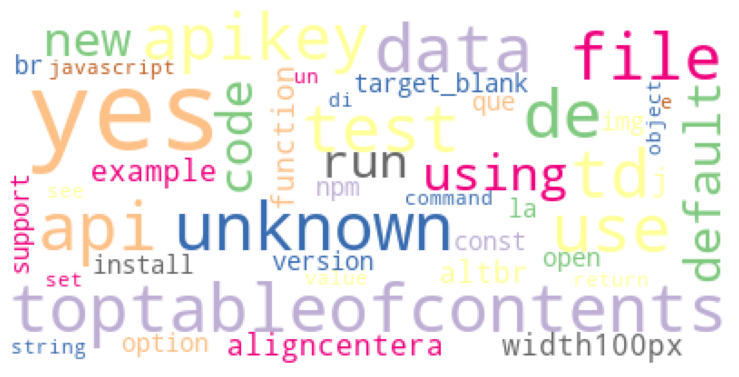

In [153]:
from wordcloud import WordCloud


img = WordCloud(background_color='white',colormap='Accent').generate(top_words_cloud)
# WordCloud() produces an image object, which can be displayed with plt.imshow
plt.imshow(img)
# axis aren't very useful for a word cloud
plt.axis('off')

In [ ]:
all_cloud = WordCloud(background_color='white', height=1000, width=400).generate(' '.join(all_words))
ham_cloud = WordCloud(background_color='white', height=600, width=800).generate(' '.join(ham_words))
spam_cloud = WordCloud(background_color='white', height=600, width=800).generate(' '.join(spam_words))

plt.figure(figsize=(10, 8))
axs = [plt.axes([0, 0, .5, 1]), plt.axes([.5, .5, .5, .5]), plt.axes([.5, 0, .5, .5])]

axs[0].imshow(all_cloud)
axs[1].imshow(ham_cloud)
axs[2].imshow(spam_cloud)

axs[0].set_title('All Words')
axs[1].set_title('Ham')
axs[2].set_title('Spam')

for ax in axs: ax.axis('off')

### Top 10 Words unique to Python Vs JavaScript

In [34]:
unique_df = pd.concat([word_counts[word_counts.JavaScript == 0].sort_values(by='Python').tail(10),
           word_counts[word_counts.Python == 0].sort_values(by='JavaScript').tail(10)])


In [35]:
# figure out the percentage of spam vs ham
(word_counts
 .assign(p_spam=word_counts.spam / word_counts['all'],
         p_ham=word_counts.ham / word_counts['all'])
 .sort_values(by='all')
 [['p_spam', 'p_ham']]
 .tail(20)
 .sort_values('p_ham')
 .plot.barh(stacked=True))

plt.title('Proportion of Spam vs Ham for the 20 most common words')


AttributeError: 'DataFrame' object has no attribute 'spam'

In [ ]:
# figure out the percentage of spam vs ham
(word_counts
 .assign(p_python=word_counts.Python / word_counts['AllWords'],
         p_javascript=word_counts.JavaScript / word_counts['AllWords'])
 .sort_values(by='AllWords')
 [['p_python', 'p_javascript']]
 .tail(20)
 .sort_values('p_javascript')
 .plot.barh(stacked=True))

plt.title('Proportion of Python vs JavaScript for the 20 most common words')

In [ ]:
(word_counts
 [(word_counts.Python > 10) & (word_counts.JavaScript > 10)]
 .assign(ratio=lambda df: df.Python / (df.JavaScript + .01))
 .sort_values(by='ratio')
 .pipe(lambda df: pd.concat([df.head(), df.tail()])))


In [ ]:
top_20_JavaScript_bigrams = (pd.Series(nltk.ngrams(JavaScript_words, 2))
                      .value_counts()
                      .head(20))

top_20_JavaScript_bigrams.head()


In [ ]:
top_20_JavaScript_bigrams.sort_values(ascending=False).plot.barh(color='pink', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring JavaScript bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_JavaScript_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)


In [36]:
top_20_Python_bigrams = (pd.Series(nltk.ngrams(Python_words, 2))
                      .value_counts()
                      .head(20))

top_20_Python_bigrams.head()

(yes, unknown)    838
(apikey, yes)     576
(yes, yes)        394
(oauth, yes)      146
(data, yes)        79
dtype: int64

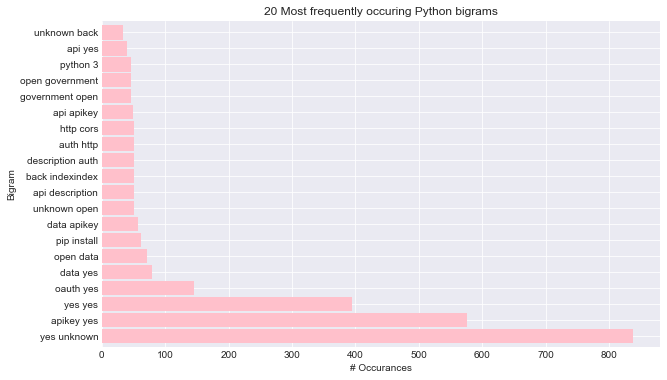

In [37]:
top_20_Python_bigrams.sort_values(ascending=False).plot.barh(color='pink', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring Python bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_Python_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)


In [38]:
word_counts['raw_count'] = word_counts.AllWords
#.assign(frequency=lambda df: df.raw_count / df.raw_count.sum()).assign(augmented_frequency=lambda df: df.frequency / df.frequency.max())

In [39]:
word_counts['frequency'] = word_counts.raw_count / word_counts.raw_count.sum()

In [40]:
word_counts['augmented_frequency'] = word_counts.frequency / word_counts.frequency.max()

In [41]:
word_counts

,JavaScript,Java,Python,TypeScript,AllWords,raw_count,frequency,augmented_frequency
&#9,467,179,6,50,702,702,0.004039,0.403448
0,113,16,44,39,212,212,0.001220,0.121839
00,0,0,36,0,36,36,0.000207,0.020690
000,3,0,1,0,4,4,0.000023,0.002299
0000,3,0,9,0,12,12,0.000069,0.006897
...,...,...,...,...,...,...,...,...
zubehttpszubeiodocsapi,0,0,1,0,1,1,0.000006,0.000575
zuijiawoniuhttpsgithubcomzuijiawoniu,0,0,1,0,1,1,0.000006,0.000575
zwx6c000,0,0,1,0,1,1,0.000006,0.000575
zxvf,0,1,1,0,2,2,0.000012,0.001149


### Model

In [42]:
from sklearn.feature_extraction.text import CountVectorizer

# same basic process as any sklearn transformation:
# make the thing
cv = CountVectorizer()
# use the thing
bag_of_words = cv.fit_transform(train.clean_text)

In [43]:
bag_of_words

<210x37734 sparse matrix of type '<class 'numpy.int64'>'
	with 74596 stored elements in Compressed Sparse Row format>

In [44]:

bow = pd.DataFrame(bag_of_words.todense())
bow.columns = cv.get_feature_names()

In [45]:
bow

,00,000,0000,000000,00000000,00000010,00000020,00000030,00000040,00000050,...,zset,zsh,zshrc,ztvf,zu,zubehttpszubeiodocsapi,zuijiawoniuhttpsgithubcomzuijiawoniu,zwx6c000,zxvf,zzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
206,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
207,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
208,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
bag_of_words = tfidf.fit_transform(train.clean_text)

pd.DataFrame(bag_of_words.todense(), 
             columns=tfidf.get_feature_names())

,00,000,0000,000000,00000000,00000010,00000020,00000030,00000040,00000050,...,zset,zsh,zshrc,ztvf,zu,zubehttpszubeiodocsapi,zuijiawoniuhttpsgithubcomzuijiawoniu,zwx6c000,zxvf,zzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
207,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
208,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
bag_of_features = pd.Series(
    dict(
        zip(
            tfidf.get_feature_names(), tfidf.idf_
        )
    )
)

In [48]:
# the higher the score does not mean the more frequent it appears.
# what it means is that, tha particular word has more weight in determining language
bag_of_features.sort_values(ascending=False).head(10)

instantaneous                               5.658711
openwrtiot                                  5.658711
openuvhttpswwwopenuvio                      5.658711
openvisionapihttpsopenvisionapicom          5.658711
openvpnhttpsenwikipediaorgwikiopenvpn       5.658711
openwa                                      5.658711
openweathermaphttpsopenweathermaporgapi     5.658711
openwhydhttpsopenwhydgithubioopenwhydapi    5.658711
openzeppelin                                5.658711
mscoco                                      5.658711
dtype: float64

In [49]:
cv = CountVectorizer(ngram_range=(2, 3))
bag_of_grams = cv.fit_transform(train.clean_text)

In [50]:

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [51]:
X_train = train.clean_text
y_train = train.language

X_validate = validate.clean_text
y_validate = validate.language

X_test = test.clean_text
y_test = test.language


In [52]:
X_train

147    pure purehttpscloudgithubusercontentcomassets4...
80     fis3 demo fis3 fis3 uselessuseless le usesassu...
320    accountingjs tiny javascript library number mo...
66     api nodejs api service p hrefhttpswwwnpmjscomp...
150    ngxadmin img srchttpsiimgurcomomcxwz0png altev...
                             ...                        
372    jquery form build statushttpstravisciorgjquery...
125    img srcassetsjtbpheaderbluepng width1920px br ...
117    angularjs wrapper sweetalert angularjs wrapper...
124    zombiejs insanely fast headless fullstack test...
263    remarklogo buildbuildbadgebuild coveragecovera...
Name: clean_text, Length: 210, dtype: object

### Decision Tree

In [53]:
# Whatever transformations we apply to X_train need to be applied to X_test
cv = CountVectorizer()
X_bow = cv.fit_transform(X_train)
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_bow, y_train)
tree.score(X_bow, y_train)

0.7047619047619048

In [54]:
# Whatever transformations we apply to X_train need to be applied to X_test
X_bow_val = cv.transform(X_validate)
tree.score(X_bow_val, y_validate)

0.6373626373626373

### Random Forest

In [55]:
# Whatever transformations we apply to X_train need to be applied to X_test
cv1 = CountVectorizer()
X_bow1 = cv1.fit_transform(X_train)
rf = RandomForestClassifier(max_depth =6, 
                            min_samples_leaf = 2, 
                            random_state=123)
rf.fit(X_bow1, y_train)
rf.score(X_bow1, y_train)

0.6428571428571429

In [56]:
# Whatever transformations we apply to X_train need to be applied to X_test
X_bow_val = cv1.transform(X_validate)
rf.score(X_bow_val, y_validate)

0.46153846153846156

### KNN

In [57]:
cv2 = CountVectorizer()
X_bow = cv2.fit_transform(X_train)
knn = KNeighborsClassifier(n_neighbors=6, weights='uniform')
knn.fit(X_bow, y_train)
knn.score(X_bow, y_train)

0.5761904761904761

In [58]:
X_bow_val = cv2.transform(X_validate)
knn.score(X_bow_val, y_validate)

0.46153846153846156

# Start Here with models...Final Run

In [ ]:
X_train,y_train,X_validate,y_validate, X_test, y_test = m.model_prep(train, validate, test)

In [ ]:
cv = m.cv_countvectorizer(X_train)

In [ ]:
DecisionTree_Train,DecisionTree_Validate=m.get_tree(X_train,y_train,X_validate,y_validate, X_test,y_test,cv)

In [ ]:
KNN_Train,KNN_Validate = m.get_knn(X_train,y_train,X_validate,y_validate, X_test,y_test,cv)

In [ ]:
RandomForest_Train,RandomForest_Validate =m.get_forest(X_train,y_train,X_validate,y_validate, X_test,y_test,cv)

In [ ]:
models = ['Baseline Train', 'DecisionTree_Train', 'RandomForest_Train','KNN_Train','Baseline_Validate', 'DecisionTree_Validate', 'RandomForest_Validate','KNN_Validate']
def make_stats_df():
    '''
    Function creates dataframe for results of pearsonsr statistical 
    test for all features.
    '''
    evaluate_df = pd.DataFrame()
    evaluate_df['models'] = models
    return evaluate_df

def final_eval(train, validate, evaluate_df):
    base_train = baseline_mean_errors(train,validate)
    simp_train = lm_errors(train)
    gen_train = glm_errors(train)
    base_val = baseline_mean_errors(train,validate)
    simp_val = lm_errors(validate)
    gen_val = glm_errors(validate)


    scores = [base_train, simp_train, gen_train, base_val, simp_val, gen_val]
    evaluate_df['RMSE']=scores
    
    return evaluate_df

In [ ]:
make_stats_df()